<a href="https://colab.research.google.com/github/aakankshalahane/Machine-Learning-Intern-Projects/blob/main/Location_based_analysisipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong City   
3      SM 

/tmp/ipython-input-3755962035.py:39: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




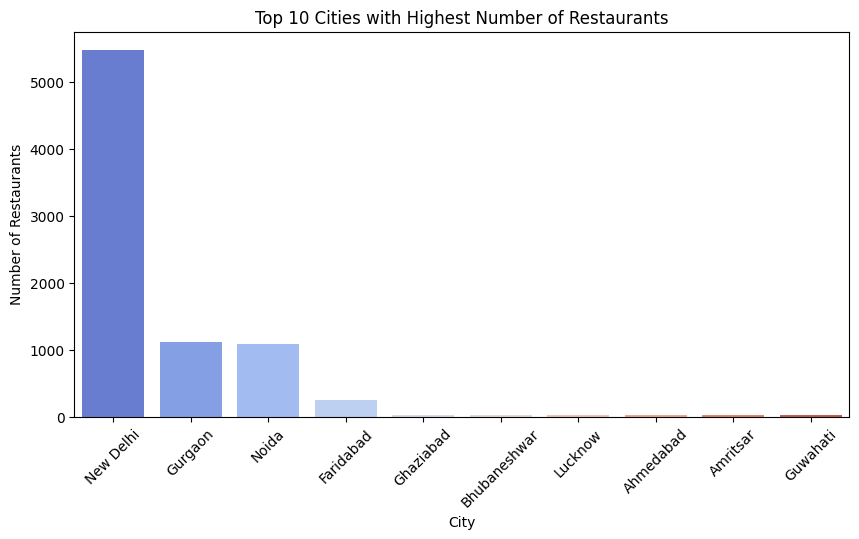

/tmp/ipython-input-3755962035.py:48: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




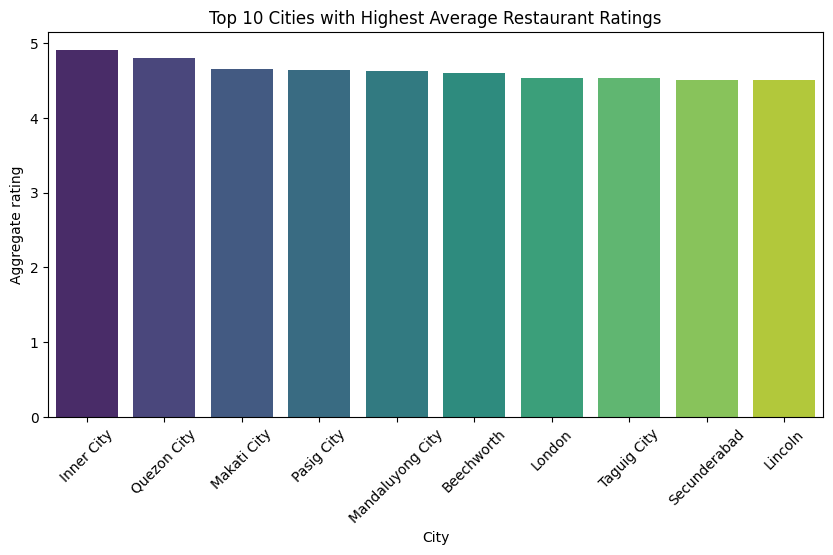

/tmp/ipython-input-3755962035.py:57: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




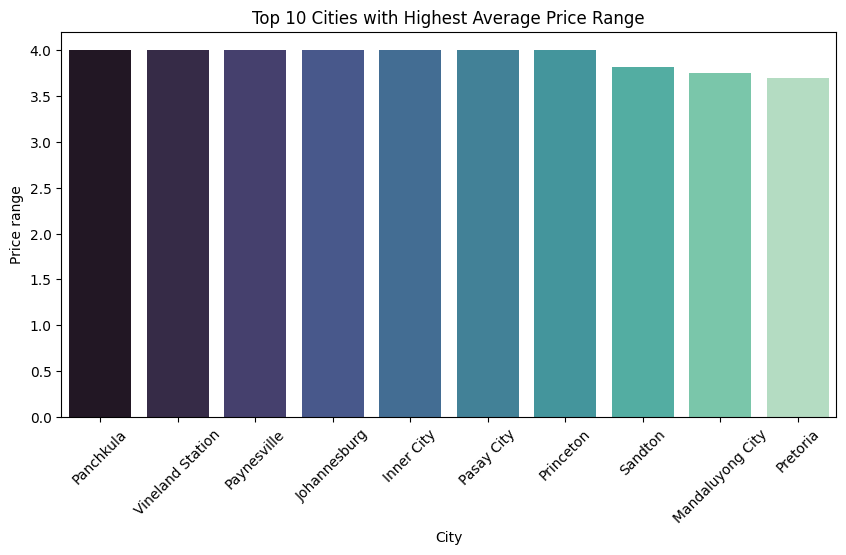


 Key Points:
- Cities with a higher number of restaurants tend to have a diverse range of cuisines.
- Premium localities usually show higher average price ranges and ratings.
- A few cities dominate the restaurant market, indicating potential business hotspots.


In [ ]:
# Location-Based Restaurant Analysis

#  libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

#dataset
data = pd.read_csv("/content/Dataset .csv")
print(data.head())

#  missing data
print(data[['Latitude', 'Longitude', 'City']].isnull().sum())

#map visualization
data = data.dropna(subset=['Latitude', 'Longitude'])

# Visualize restaurant
fig = px.scatter_mapbox(
    data,
    lat="Latitude",
    lon="Longitude",
    hover_name="Restaurant Name",
    hover_data=["City", "Aggregate rating"],
    color="Aggregate rating",
    color_continuous_scale="Viridis",
    zoom=4,
    height=600,
    title="Restaurant Distribution by Location")
fig.update_layout(mapbox_style="open-street-map")
fig.show()

# Analyze restaurant
city_counts = data['City'].value_counts().reset_index()
city_counts.columns = ['City', 'Number of Restaurants']

plt.figure(figsize=(10,5))
sns.barplot(x='City', y='Number of Restaurants', data=city_counts.head(10), palette='coolwarm')
plt.title("Top 10 Cities with Highest Number of Restaurants")
plt.xticks(rotation=45)
plt.show()

#  average rating
avg_rating_city = data.groupby('City')['Aggregate rating'].mean().reset_index().sort_values(by='Aggregate rating', ascending=False)

plt.figure(figsize=(10,5))
sns.barplot(x='City', y='Aggregate rating', data=avg_rating_city.head(10), palette='viridis')
plt.title("Top 10 Cities with Highest Average Restaurant Ratings")
plt.xticks(rotation=45)
plt.show()

# average price
avg_price_city = data.groupby('City')['Price range'].mean().reset_index().sort_values(by='Price range', ascending=False)

plt.figure(figsize=(10,5))
sns.barplot(x='City', y='Price range', data=avg_price_city.head(10), palette='mako')
plt.title("Top 10 Cities with Highest Average Price Range")
plt.xticks(rotation=45)
plt.show()

# Observations
print("\n Key Points:")
print("- Cities with a higher number of restaurants tend to have a diverse range of cuisines.")
print("- Premium localities usually show higher average price ranges and ratings.")
print("- A few cities dominate the restaurant market, indicating potential business hotspots.")



In [ ]:
import os

# List files in the /content directory
print(os.listdir('/content'))

['.config', 'Dataset .csv', 'sample_data']
